 MÔ HÌNH : SVM,RF

In [1]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt


In [5]:
data = np.load("C:/Users/Loc/Desktop/DACS_git/Do_An_Co_So/code/code_final/train_embeddings.npz")
print("Keys in the npz file:", data.files)


Keys in the npz file: ['X', 'y']


In [6]:
# yai du liệu train/test đã chia
# train
train_data = np.load("C:/Users/Loc/Desktop/DACS_git/Do_An_Co_So/code/code_final/train_embeddings.npz", allow_pickle=True)
X_train = train_data['X']
y_train = train_data['y']

# test
test_data = np.load("C:/Users/Loc/Desktop/DACS_git/Do_An_Co_So/code/code_final/test_embeddings.npz", allow_pickle=True)
X_test = test_data['X']
y_test = test_data['y']

print(f"Train samples: {len(X_train)}, Test samples: {len(X_test)}")


Train samples: 448, Test samples: 207


MH SVM


Accuracy SVM: 0.9758454106280193
Classification Report (SVM):
                precision    recall  f1-score   support

     Duy Khôi       1.00      1.00      1.00         2
        Dũng       1.00      1.00      1.00         2
      Dương       1.00      1.00      1.00        16
          Hà       1.00      1.00      1.00         2
       Hiếu       0.89      1.00      0.94        24
        Hưng       1.00      0.50      0.67         2
         Khôi       0.00      0.00      0.00         2
        Lành       1.00      1.00      1.00         6
         Linh       1.00      1.00      1.00        36
        Luân       1.00      1.00      1.00         3
       Nghĩa       1.00      1.00      1.00         3
       Nguyên       1.00      1.00      1.00         9
Nhật Tiến       1.00      1.00      1.00         2
         Phú       1.00      1.00      1.00         5
     Phương       0.90      1.00      0.95        18
        Quang       1.00      1.00      1.00        21
 

c:\Users\Loc\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Loc\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Loc\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier

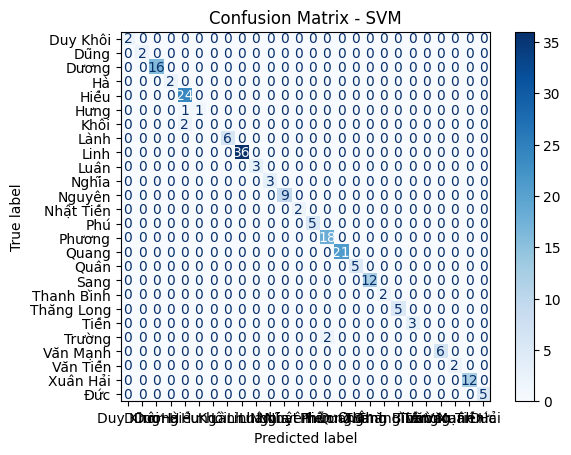

In [7]:
svm_model = SVC(kernel='linear', probability=True)
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)

print("Accuracy SVM:", accuracy_score(y_test, y_pred_svm))
print("Classification Report (SVM):\n", classification_report(y_test, y_pred_svm))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_svm, cmap='Blues')
plt.title("Confusion Matrix - SVM")
plt.show()


RF


 Accuracy RF: 0.9806763285024155
Classification Report (Random Forest):
                precision    recall  f1-score   support

     Duy Khôi       1.00      1.00      1.00         2
        Dũng       1.00      1.00      1.00         2
      Dương       1.00      1.00      1.00        16
          Hà       1.00      1.00      1.00         2
       Hiếu       1.00      1.00      1.00        24
        Hưng       1.00      1.00      1.00         2
         Khôi       1.00      0.50      0.67         2
        Lành       1.00      1.00      1.00         6
         Linh       1.00      1.00      1.00        36
        Luân       1.00      0.67      0.80         3
       Nghĩa       1.00      1.00      1.00         3
       Nguyên       0.90      1.00      0.95         9
Nhật Tiến       1.00      1.00      1.00         2
         Phú       1.00      1.00      1.00         5
     Phương       0.90      1.00      0.95        18
        Quang       0.95      1.00      0.98  

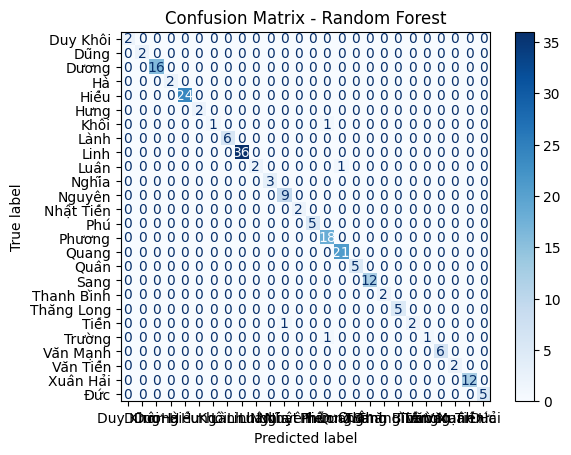

In [10]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

print(" Accuracy RF:", accuracy_score(y_test, y_pred_rf))
print("Classification Report (Random Forest):\n", classification_report(y_test, y_pred_rf))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_rf, cmap='Blues')
plt.title("Confusion Matrix - Random Forest")
plt.show()


MH mobilenetv2 , ResNet50

In [1]:
import tensorflow as tf
import os


train_dir = "C:/Users/Loc/Desktop/DACS_git/Do_An_Co_So/code/code_final/data_split/train"
test_dir = "C:/Users/Loc/Desktop/DACS_git/Do_An_Co_So/code/code_final/data_split/test"

img_size = (160, 160)
batch_size = 32

# Load ảnh thành dataset
train_ds = tf.keras.utils.image_dataset_from_directory(
    train_dir,
    image_size=img_size,
    batch_size=batch_size,
    label_mode='categorical'  # vì softmax
)

val_ds = tf.keras.utils.image_dataset_from_directory(
    test_dir,
    image_size=img_size,
    batch_size=batch_size,
    label_mode='categorical'
)

# Tối ưu hiệu suất
AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.cache().shuffle(100).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

# Mô hình MobileNetV2 + phân lớp
base_model = tf.keras.applications.MobileNetV2(
    input_shape=img_size + (3,),
    include_top=False,
    weights='imagenet'
)
base_model.trainable = False

x = tf.keras.layers.GlobalAveragePooling2D()(base_model.output)
x = tf.keras.layers.Dense(128, activation='relu')(x)
output = tf.keras.layers.Dense(train_ds.element_spec[1].shape[-1], activation='softmax')(x)

model = tf.keras.Model(inputs=base_model.input, outputs=output)

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Huấn luyện
model.fit(train_ds, validation_data=val_ds, epochs=10)

# Lưu model
model.save("model_mobilenetv2.h5")
print("\n Đã lưu model MobileNetV2 vào model_mobilenetv2.h5")

UnicodeDecodeError: 'utf-8' codec can't decode byte 0xf4 in position 85: invalid continuation byte

In [2]:

from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report, accuracy_score

# Load embeddings
train_data = np.load('train_embeddings.npz')
test_data = np.load('test_embeddings.npz')

X_train, y_train = train_data['X'], train_data['y']
X_test, y_test = test_data['X'], test_data['y']

#  Encode labels 
label_encoder = LabelEncoder()
y_train_enc = label_encoder.fit_transform(y_train)
y_test_enc = label_encoder.transform(y_test)

# === One-hot encoding ===
y_train_cat = to_categorical(y_train_enc)
y_test_cat = to_categorical(y_test_enc)

#  MLP model (ResNet-like classifier on features)
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dropout(0.5))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(len(np.unique(y_train)), activation='softmax'))

# === Compile ===
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# === Train ===
model.fit(X_train, y_train_cat, epochs=50, batch_size=16, validation_split=0.2)

# === Predict & evaluate ===
y_pred = model.predict(X_test)
y_pred_labels = np.argmax(y_pred, axis=1)

# === Accuracy & report ===
acc = accuracy_score(y_test_enc, y_pred_labels)
print(f"\n Accuracy (ResNet-inspired MLP): {acc:.4f}\n")

print(" Classification Report:")
print(classification_report(y_test_enc, y_pred_labels, target_names=label_encoder.classes_))


c:\Users\Loc\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - accuracy: 0.3469 - loss: 2.9365 - val_accuracy: 0.0000e+00 - val_loss: 5.4959
Epoch 2/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6257 - loss: 1.4598 - val_accuracy: 0.0000e+00 - val_loss: 6.6932
Epoch 3/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8204 - loss: 0.7238 - val_accuracy: 0.0000e+00 - val_loss: 6.8494
Epoch 4/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9038 - loss: 0.4437 - val_accuracy: 0.0000e+00 - val_loss: 7.7275
Epoch 5/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9357 - loss: 0.3134 - val_accuracy: 0.0000e+00 - val_loss: 8.4530
Epoch 6/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9646 - loss: 0.2006 - val_accuracy: 0.0111 - val_loss: 9.2137
Epoch 7/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9842 - loss: 0.1227 - val_accuracy: 0.0222 - val_loss: 9.6746
Epoch 8/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9809 - loss: 0.0966 - val_

c:\Users\Loc\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Loc\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Loc\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier